<b>Heart Disease Data Set</b>

<b>Data Set Information:</b>

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

<b>Importing Necessary Libraries</b>

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

In [288]:
heart_d=pd.read_csv("heart.csv")
heart_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [289]:
heart_d.shape

(303, 14)

In [290]:
heart_d.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<b> Observation:</b>
There are 13 attributes which are of int datatype and 1 attribute (oldpeak) is of float datatype.

In [291]:
# Removing the duplicate rows in the dataset
print("Shape of the dataset before removing the duplicate",heart_d.shape)
heart_d.drop_duplicates(inplace=True)
print("Shape of the dataset after removing the duplicate",heart_d.shape)

Shape of the dataset before removing the duplicate (303, 14)
Shape of the dataset after removing the duplicate (302, 14)


<b>Statistics Summary</b>

In [292]:
heart_d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Checking Missing Value</b>

In [293]:
heart_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trestbps    302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalach     302 non-null int64
exang       302 non-null int64
oldpeak     302 non-null float64
slope       302 non-null int64
ca          302 non-null int64
thal        302 non-null int64
target      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [294]:
heart_d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<b>Observation:</b>
There is no missing values in the dataset.

# Exploratory Data Analysis

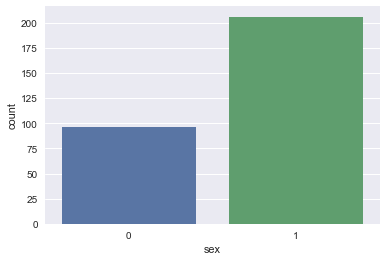

In [133]:
sns.countplot(heart_d["sex"])

<b>Observation:</b>
There are more females as compare to males.

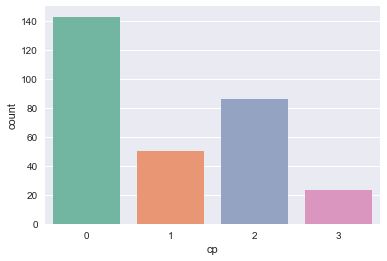

In [134]:
sns.countplot(heart_d["cp"],palette="Set2")

<b>Observation:</b>
People who have typical angina chest pain have high chances of heart problems.

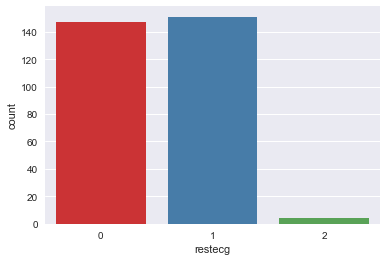

In [136]:
sns.countplot(heart_d["restecg"],palette="Set1")

<b>Observation:</b>
From the above analysis, we see that people with restecg 0 or 1 are more likely to have a heart disease.

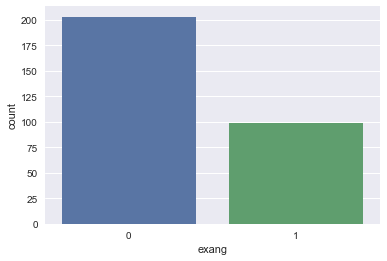

In [137]:
sns.countplot(heart_d["exang"])

<b>Observation:</b>
People with exang 1 are less likely to have heart disease.

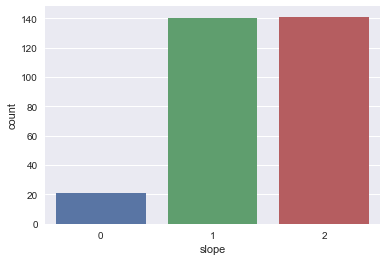

In [139]:
sns.countplot(heart_d["slope"])

<b>Observation:</b>
People with slope 1 and 2 have heart disease.

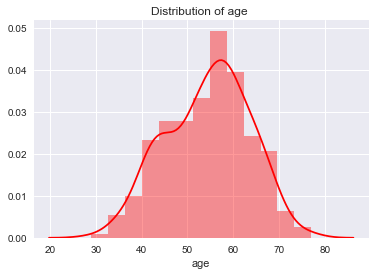

In [164]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6,4))
plt.title("Distribution of age ")
a= sns.distplot(heart_d["age"], color = 'red')

<b>Observation:</b>
Average age of people is 55.

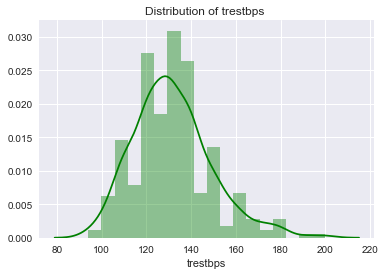

In [144]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6,4))
plt.title("Distribution of trestbps ")
b= sns.distplot(heart_d["trestbps"], color = 'green')

<b>Observation:</b>
The average person's resting blood pressure is 130.

In [152]:
heart_d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<b>Bi-Variate Analysis</b>

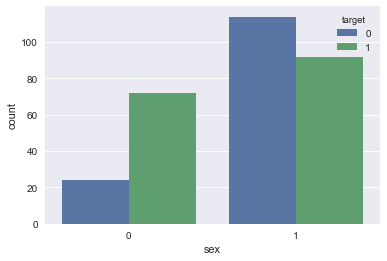

In [163]:
sns.countplot(x="sex", hue="target",data=heart_d)
plt.show()

There are more males who have heart disease.

<b>Multi-Variate Analysis</b>

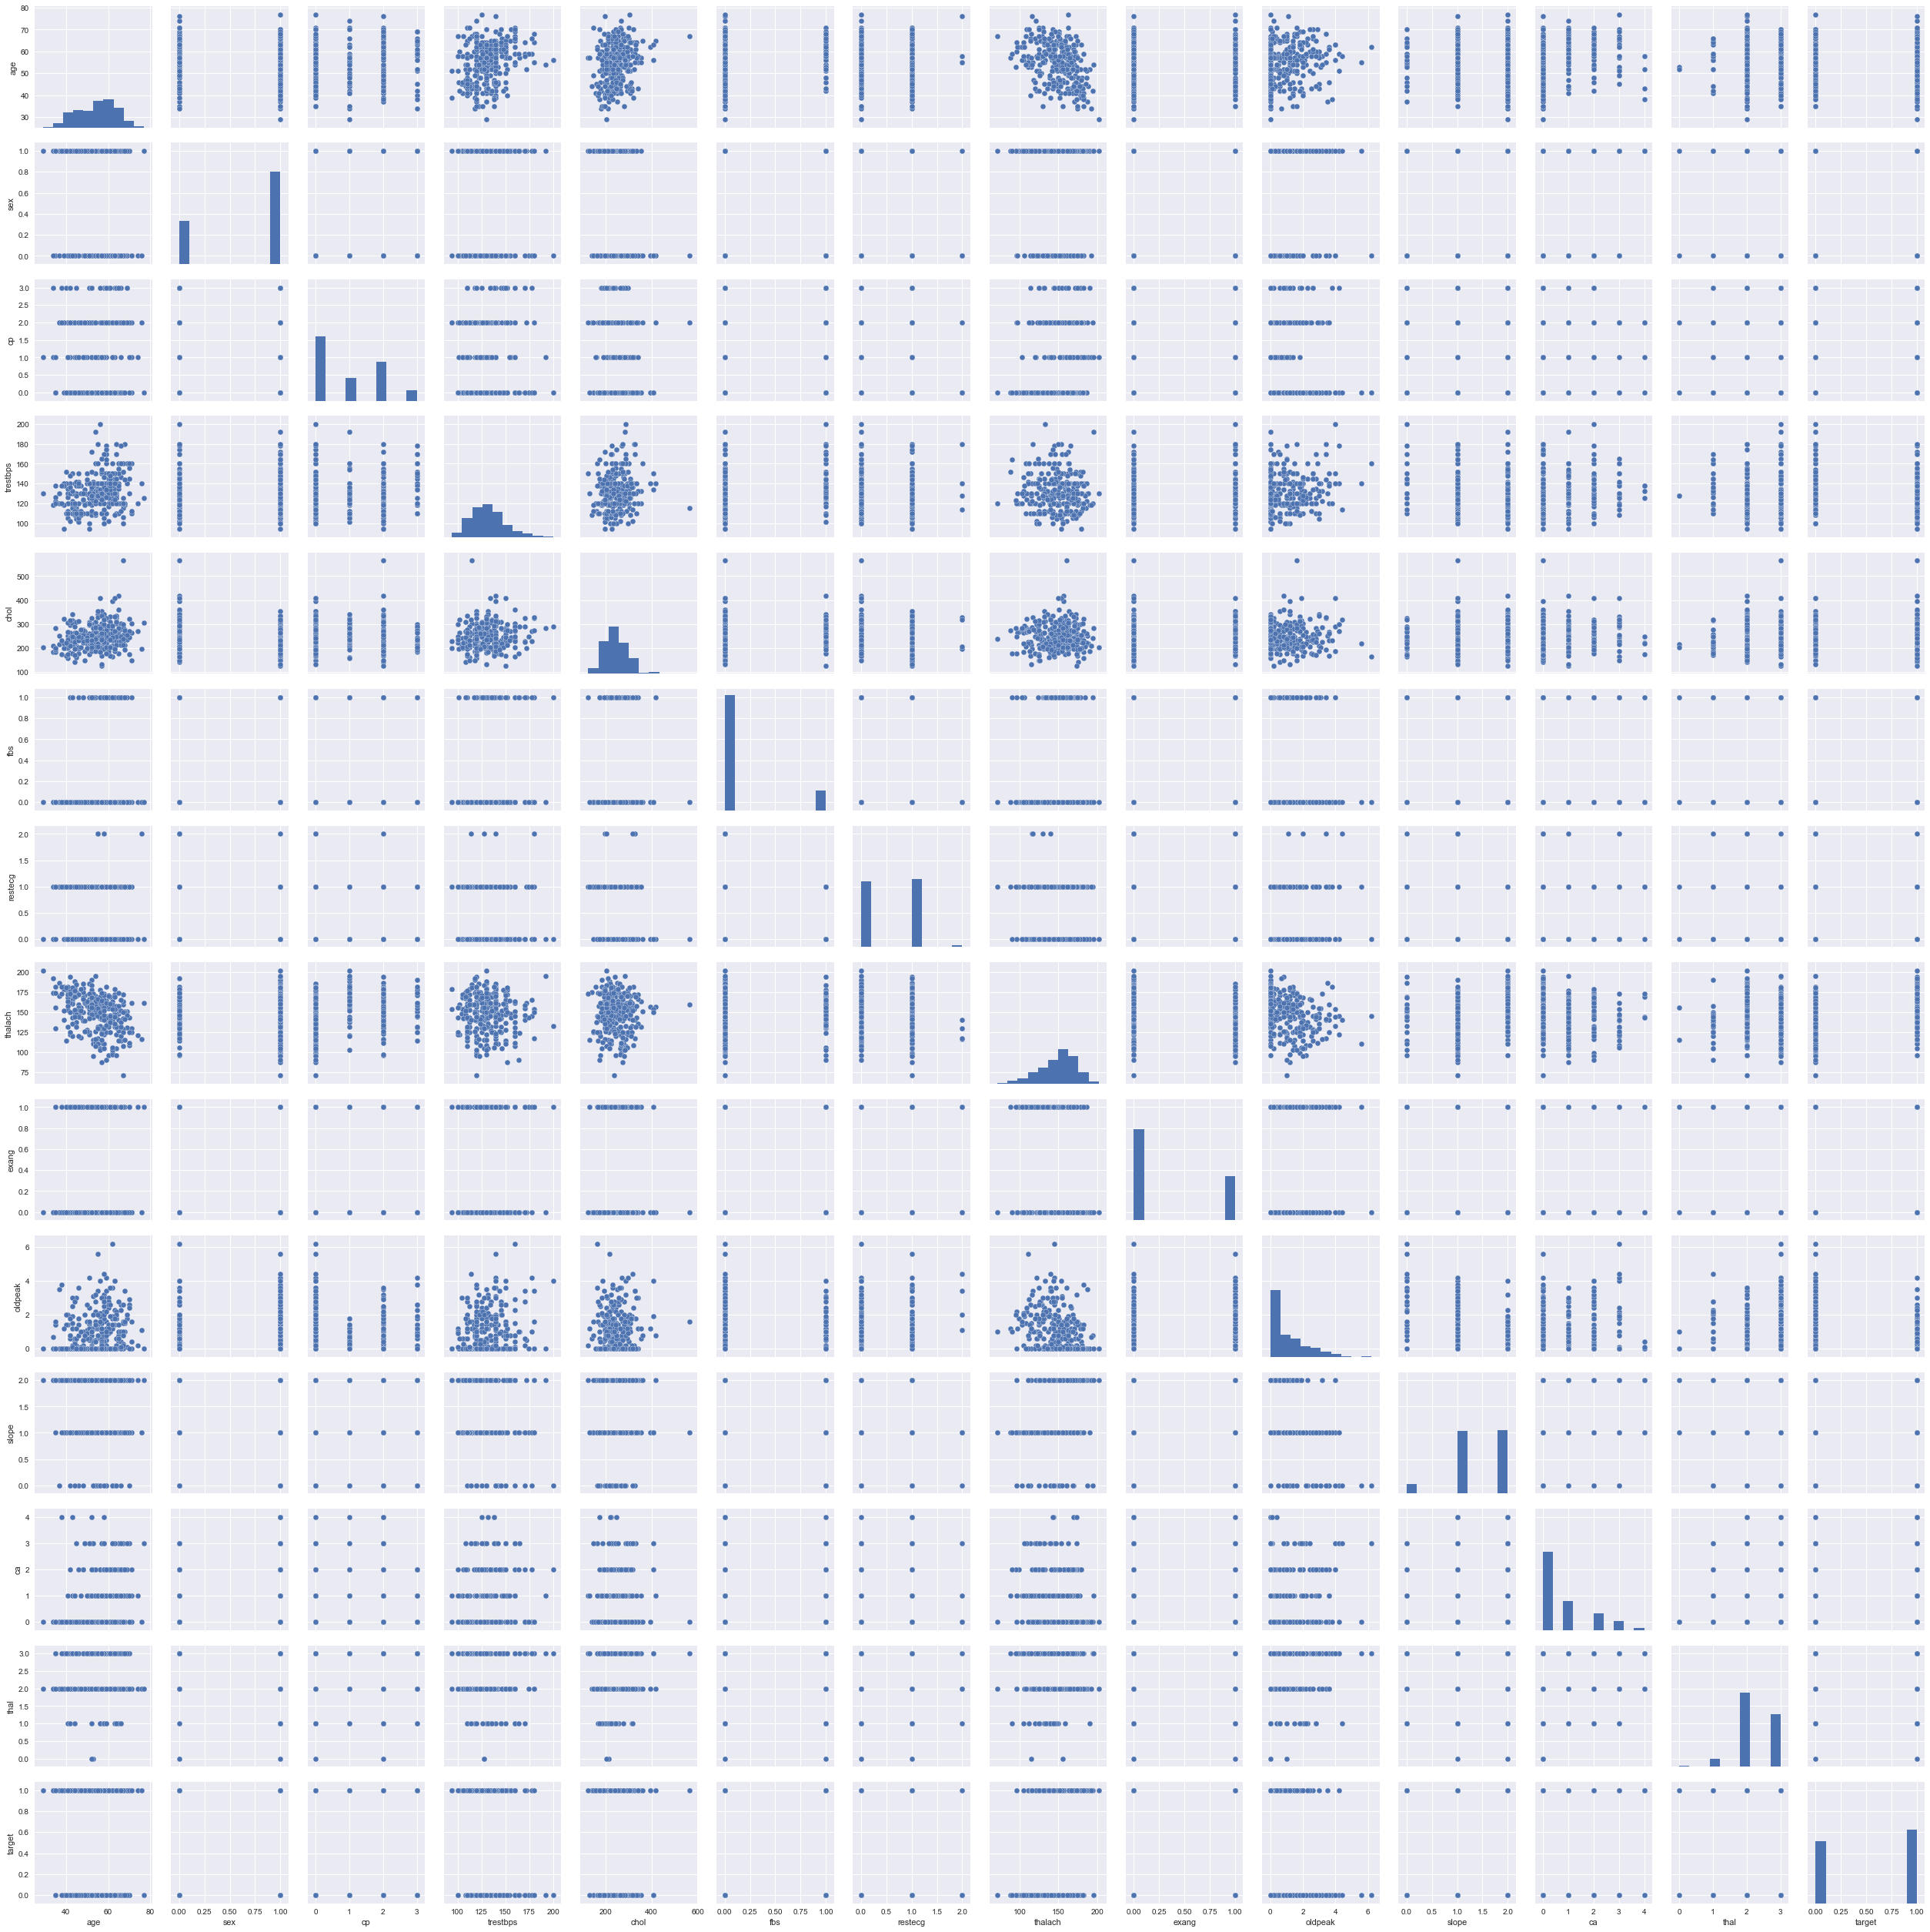

In [170]:
sns.pairplot(heart_d)

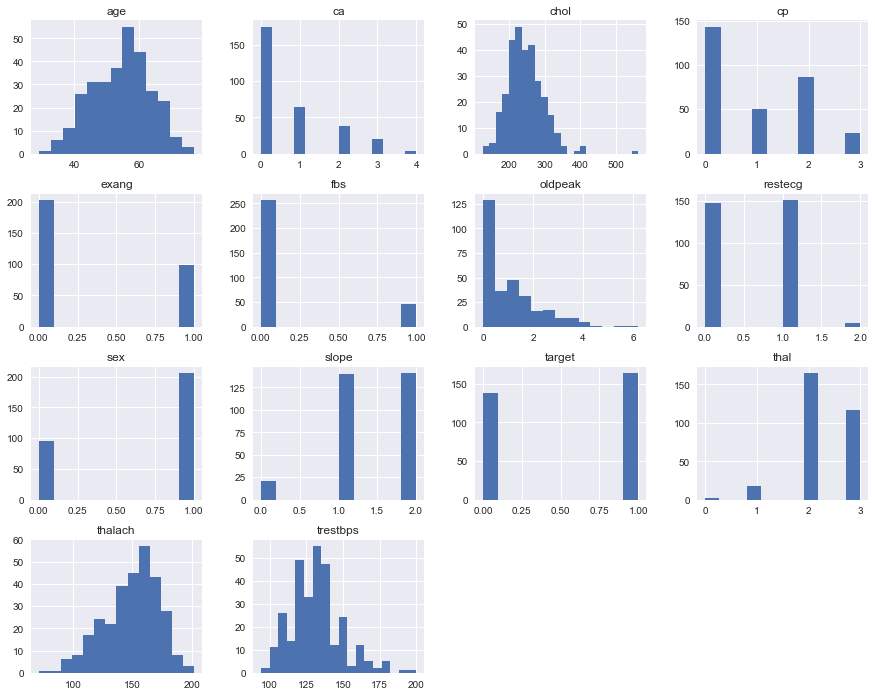

In [149]:
heart_d.hist(figsize=(15,12),grid=True,bins='auto');

<b>Observation:</b>
Looking at the distribution. Not all the attributes are on the same scale. We will use Standard Scaler to convert this.

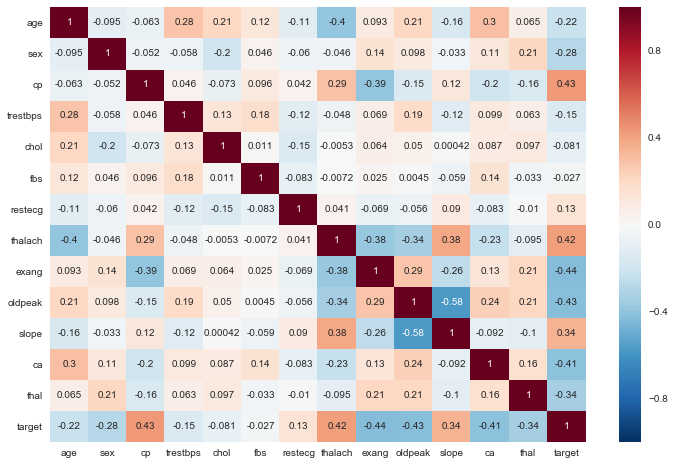

In [150]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_d.corr(),annot=True)
plt.show()

<b>Observation:</b>
cp and thalach are correlated. 

In [295]:
# Removing one attribute(thalach) from dataset. As it has multicollinearity.
heart_d.drop(["thalach"],axis=1,inplace=True)

<b>Checking Skewness</b>

In [296]:
heart_d.skew(axis=0)

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

In [297]:
# Treating the skewness in the dataset
for index in heart_d.skew().index:
    if heart_d.skew().loc[index]>0.5:
        heart_d[index]=np.log1p(heart_d[index])

In [298]:
heart_d.skew(axis=0)

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.288650
chol        0.088562
fbs         1.981201
restecg     0.169467
exang       0.737281
oldpeak     0.391946
slope      -0.503247
ca          0.756881
thal       -0.481232
target     -0.173691
dtype: float64

<b>Checking Outliers in the dataset</b>

In [299]:
from scipy.stats import zscore
z_score=abs(zscore(heart_d))
print("The shape of dataset before removing outliers",heart_d.shape)
heart_d=heart_d.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",heart_d.shape)

The shape of dataset before removing outliers (302, 13)
The shape of dataset after removing outliers (296, 13)


<b>Dividing into input and output variables</b>

In [300]:
X= heart_d.drop(["target"],axis=1)
y= heart_d["target"]

In [301]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into training and testing</b>

In [302]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [303]:
# We will use auc_roc score as the metrics because target variable has imbalance dataset
def max_auc_roc_score(models,X,y):
    max_auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        models.fit(X_train,y_train)
        y_pred= models.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>max_auc_roc_score:
            max_auc_roc_score=auc_roc
            ac_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",ac_score," and it is :",round((max_auc_roc_score),2))

# Machine Learning Models:

As the target variable(target) is binary, its a classfication problem. We are using Logistic Regression, Random Forest Classifier, Naive Bayes Classifier, Gradient Boosting Classifier, KNN Classifier and XG Boost Classifier.

<b>Logistic Regression</b>

In [304]:
log_reg=LogisticRegression()
param= {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
log_reg=GridSearchCV(log_reg,param,cv=10)
log_reg.fit(X,y)
log_reg.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [305]:
log_reg=LogisticRegression(C=0.1,penalty='l2')
max_auc_roc_score(log_reg,X,y)

Maximum AUC_ROC Score corresponding to: 98  and it is : 0.91


In [306]:
predlog= log_reg.predict(X_test)
s1= log_reg.score(X_test, y_test)
print("The accuracy of the Logistic Model is:",round((s1),3))

The accuracy of the Logistic Model is: 0.831


In [307]:
print(confusion_matrix(y_test,predlog))

[[31 10]
 [ 5 43]]


<b>Observations:</b>
<li> There are 31 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 43 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 10 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 5 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [308]:
print(classification_report(y_test,predlog))

             precision    recall  f1-score   support

          0       0.86      0.76      0.81        41
          1       0.81      0.90      0.85        48

avg / total       0.83      0.83      0.83        89



In [309]:
mean_log_auc=cross_val_score(log_reg, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(log_reg, X,y,cv=5,scoring="roc_auc").mean())
std_log_auc= cross_val_score(log_reg, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for logistic from mean AUC_ROC score is",cross_val_score(log_reg, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9085437710437712
standard deviation for logistic from mean AUC_ROC score is 0.027440819234082953


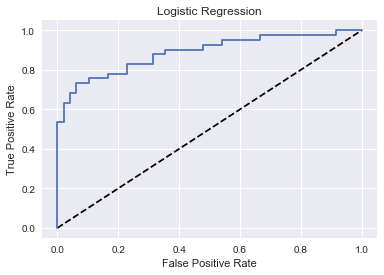

In [310]:
y_pred_prob= log_reg.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [311]:
ac1=roc_auc_score(y_test, log_reg.predict(X_test))
ac1

0.8259654471544716

<b>Random Forest Classifier</b>

In [312]:
from sklearn.ensemble import RandomForestClassifier
m2= RandomForestClassifier()
parameters= {'n_estimators':[2,4,8],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[5,7,9],'min_samples_split':[3,5,9],'min_samples_leaf':[1,3,5]}
m2= GridSearchCV(m2,parameters)
m2.fit(X,y)
m2.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 8}

In [313]:
m2=RandomForestClassifier(criterion='gini', max_depth=7,max_features='sqrt',min_samples_leaf=5,min_samples_split=5,n_estimators=8)
max_auc_roc_score(m2,X,y)

Maximum AUC_ROC Score corresponding to: 71  and it is : 0.87


In [314]:
pred_m2= m2.predict(X_test)
rf2= m2.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((rf2),3))

The accuracy of the Random Forest Classifier is: 0.865


In [315]:
print(confusion_matrix(y_test,pred_m2))

[[33  8]
 [ 4 44]]


<b>Observations:</b>
<li> There are 33 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 44 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 8 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 4 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [316]:
print(classification_report(y_test,pred_m2))

             precision    recall  f1-score   support

          0       0.89      0.80      0.85        41
          1       0.85      0.92      0.88        48

avg / total       0.87      0.87      0.86        89



In [317]:
from sklearn.model_selection import cross_val_score
mean_rf=cross_val_score(m2, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(m2, X,y,cv=5,scoring="roc_auc").mean())
std_rf= cross_val_score(m2, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Random Forest Classifier from mean AUC_ROC score is",cross_val_score(m2, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9018097643097642
standard deviation for Random Forest Classifier from mean AUC_ROC score is 0.027560555784544687


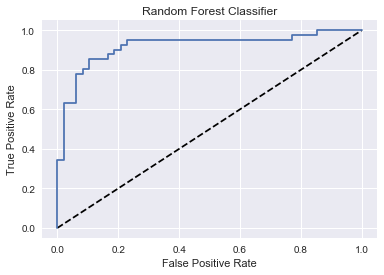

In [318]:
y_pred_prob= m2.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [319]:
ac2=roc_auc_score(y_test, m2.predict(X_test))
ac2

0.8607723577235773

<b>SVM Classifier</b>

In [320]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
m3=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
m3 = GridSearchCV(m3, parameters, cv=5,scoring="roc_auc")
m3.fit(X,y)
m3.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [321]:
m3=SVC(kernel="linear",C=0.1,probability=True)
max_auc_roc_score(m3,X,y)

Maximum AUC_ROC Score corresponding to: 71  and it is : 0.91


In [322]:
predm3= m3.predict(X_test)
sv3= m3.score(X_test, y_test)
print("The accuracy of the SVM Model is:",round((sv3),3))

The accuracy of the SVM Model is: 0.82


In [323]:
print(confusion_matrix(y_test,predm3))

[[30 11]
 [ 5 43]]


<b>Observations:</b>
<li> There are 30 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 43 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 11 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 5 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [324]:
print(classification_report(y_test,predm3))

             precision    recall  f1-score   support

          0       0.86      0.73      0.79        41
          1       0.80      0.90      0.84        48

avg / total       0.82      0.82      0.82        89



In [325]:
mean_sv=cross_val_score(m3, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(m3, X,y,cv=5,scoring="roc_auc").mean())
std_sv= cross_val_score(m3, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for SVM from mean AUC_ROC score is",cross_val_score(m3, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9108656004489338
standard deviation for SVM from mean AUC_ROC score is 0.028360324496467068


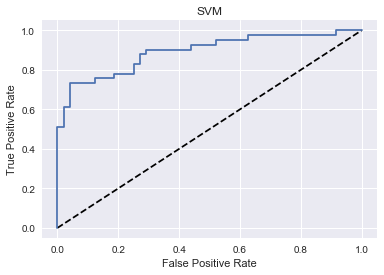

In [326]:
y_pred_prob= m3.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.show()

In [327]:
ac3=roc_auc_score(y_test, m3.predict(X_test))
ac3

0.8137703252032521

<b>Gradient Boosting Classifier</b>

In [328]:
m4 = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05,0.07], 'subsample': [0.1, 0.5,0.3,0.7], 'n_estimators': [10,50,100,500], 'max_depth': [2,4,8,10]}
m4= GridSearchCV(estimator=m4, param_grid= parameters, cv=5, n_jobs=-1)
m4.fit(X,y)
m4.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.3}

In [329]:
m4 = GradientBoostingClassifier(learning_rate=0.01,max_depth=8,n_estimators=100,subsample=0.3)
max_auc_roc_score(m4,X,y)

Maximum AUC_ROC Score corresponding to: 71  and it is : 0.91


In [330]:
pred_m4= m4.predict(X_test)
gb4= m4.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((gb4),3))

The accuracy of the Grading Boosting Model is: 0.899


In [331]:
print(confusion_matrix(y_test,pred_m4))

[[33  8]
 [ 1 47]]


<b>Observations:</b>
<li> There are 33 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 47 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 8 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [332]:
print(classification_report(y_test,pred_m4))

             precision    recall  f1-score   support

          0       0.97      0.80      0.88        41
          1       0.85      0.98      0.91        48

avg / total       0.91      0.90      0.90        89



In [333]:
from sklearn.model_selection import cross_val_score
mean_gbc=cross_val_score(m4, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(m4, X,y,cv=5,scoring="roc_auc").mean())
std_gbc= cross_val_score(m4, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(m4, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9076318742985411
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.026862369844958156


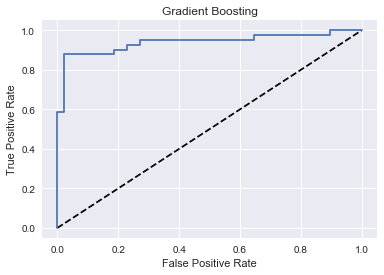

In [334]:
y_pred_prob= m4.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [335]:
ac4=roc_auc_score(y_test, m4.predict(X_test))
ac4

0.8920223577235773

<b> KNN Classifier</b>

In [336]:
knn_c= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,50)}
knn_c= GridSearchCV(knn_c, neighbors, cv=5,scoring="roc_auc")
knn_c.fit(X,y)
knn_c.best_params_

{'n_neighbors': 19}

In [337]:
knn_c=KNeighborsClassifier(n_neighbors=19)
max_auc_roc_score(knn_c,X,y)

Maximum AUC_ROC Score corresponding to: 70  and it is : 0.9


In [338]:
pred_knc= knn_c.predict(X_test)
k5= knn_c.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((k5),3))

The accuracy of the KNN Model is: 0.82


In [339]:
print(confusion_matrix(y_test,pred_knc))

[[28 13]
 [ 3 45]]


<b>Observations:</b>
<li> There are 28 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 45 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 13 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 3 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [340]:
print(classification_report(y_test,pred_knc))

             precision    recall  f1-score   support

          0       0.90      0.68      0.78        41
          1       0.78      0.94      0.85        48

avg / total       0.83      0.82      0.82        89



In [341]:
from sklearn.model_selection import cross_val_score
mean_knc_auc=cross_val_score(knn_c, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(knn_c, X,y,cv=5,scoring="roc_auc").mean())
std_knc_auc= cross_val_score(knn_c, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for KNN from mean AUC_ROC score is",cross_val_score(knn_c, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9149656285072952
standard deviation for KNN from mean AUC_ROC score is 0.02011614031427557


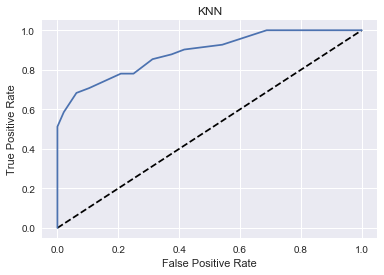

In [342]:
y_pred_prob= knn_c.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

In [343]:
ac5=roc_auc_score(y_test, knn_c.predict(X_test))
ac5

0.8102134146341462

<b>XG Boost Classifier</b>

In [344]:
m6 = XGBClassifier()
params={'min_child_weight': [1,5,7],'gamma': [0.5,1.5,2.5],"subsample":[0.4,0.8,1.0],"colsample_bytree":[0.6,0.8,1.0],'max_depth':[2,4,5]}
m6= GridSearchCV(m6, params, cv=5,scoring="roc_auc")
m6.fit(X,y)
m6.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2.5,
 'max_depth': 2,
 'min_child_weight': 7,
 'subsample': 0.8}

In [345]:
m6 = XGBClassifier(colsample_bytree=1.0,gamma=2.5,max_depth=2,min_child_weight=7,subsample=0.8)
max_auc_roc_score(m6,X,y)

Maximum AUC_ROC Score corresponding to: 71  and it is : 0.92


In [346]:
predm6= m6.predict(X_test)
xg6= m6.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((xg6),3))

The accuracy of the XG Boost Model is: 0.854


In [347]:
print(confusion_matrix(y_test,predm6))

[[31 10]
 [ 3 45]]


<b>Observations:</b>
<li> There are 31 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 45 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 10 observation which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 3 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [348]:
mean_xg_auc=cross_val_score(m6, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(m6, X,y,cv=5,scoring="roc_auc").mean())
std_xg_auc= cross_val_score(m6, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for XG Boost from mean AUC_ROC score is",cross_val_score(m6, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.921962682379349
standard deviation for XG Boost from mean AUC_ROC score is 0.02166187955651036


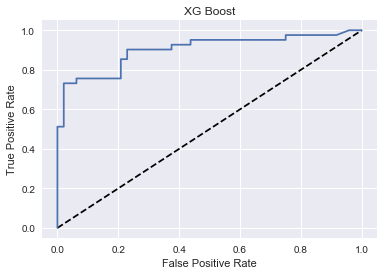

In [349]:
y_pred_prob= m6.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="XG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XG Boost")
plt.show()

In [350]:
ac6=roc_auc_score(y_test, m6.predict(X_test))
ac6

0.8467987804878048

# Evaluation:

In [351]:
#Lets initialise the data frame with columns model and f1_score
models= [["Logistic Regression", s1, mean_log_auc,std_log_auc],["Random Forest Classifier",rf2,mean_rf,std_rf],["SVM Classifier",sv3,mean_sv,std_sv],["Gradient Boosting Classifier",gb4,mean_gbc,std_gbc],["KNN Classifier",k5,mean_knc_auc,std_knc_auc],["XG Boost Classifier",xg6,mean_xg_auc,std_xg_auc]]
table= pd.DataFrame(models, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4,5,6])
table

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,Logistic Regression,0.831461,0.908544,0.027441
2,Random Forest Classifier,0.865169,0.902844,0.032453
3,SVM Classifier,0.820225,0.910866,0.028360
4,Gradient Boosting Classifier,0.898876,0.911434,0.027148
5,KNN Classifier,0.820225,0.914966,0.020116
6,XG Boost Classifier,0.853933,0.921963,0.021662


<b>Observations:</b>
<li> From the above models, Gradient Boosting Classifier performed well with 89.88% accuracy.</li>
<li>As the data was imbalanced, we used AUC ROC for model evaluation and calculated Mean F1 Score and Standard Deviation mean F1 Score, our best performed model gives Mean F1 score 0.911434 and Standard Deviation mean F1 score is 0.027148</li>

<b>Saving the Prediction</b>

In [352]:
np.savetxt('Model10.csv',pred_m4,delimiter=',')

In [353]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(m4, 'Project10.pkl')

['Project10.pkl']